In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/content/drive/MyDrive/projects/nnproject/stockdata/stock_data.csv')
df.columns = ['text', 'sentiment']
df

,text,sentiment
0,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...,1
1,user: AAP MOVIE. 55% return for the FEA/GEED i...,1
2,user I'd be afraid to short AMZN - they are lo...,1
3,MNTA Over 12.00,1
4,OI Over 21.37,1
...,...,...
5786,Industry body CII said #discoms are likely to ...,-1
5787,"#Gold prices slip below Rs 46,000 as #investor...",-1
5788,Workers at Bajaj Auto have agreed to a 10% wag...,1
5789,"#Sharemarket LIVE: Sensex off day’s high, up 6...",1


In [3]:
def labelencode(x):
  if x == -1:
    return 0
  return x
df['sentiment'] =  df['sentiment'].apply(labelencode)

In [4]:
df

,text,sentiment
0,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...,1
1,user: AAP MOVIE. 55% return for the FEA/GEED i...,1
2,user I'd be afraid to short AMZN - they are lo...,1
3,MNTA Over 12.00,1
4,OI Over 21.37,1
...,...,...
5786,Industry body CII said #discoms are likely to ...,0
5787,"#Gold prices slip below Rs 46,000 as #investor...",0
5788,Workers at Bajaj Auto have agreed to a 10% wag...,1
5789,"#Sharemarket LIVE: Sensex off day’s high, up 6...",1


In [5]:
# df = pd.read_csv('/content/drive/MyDrive/projects/nnproject/all-data.csv', encoding = "ISO-8859-1",header=None)
# df.columns = ['sentiment', 'news']
# df

In [6]:
df['sentiment'].value_counts()

1    3685
0    2106
Name: sentiment, dtype: int64

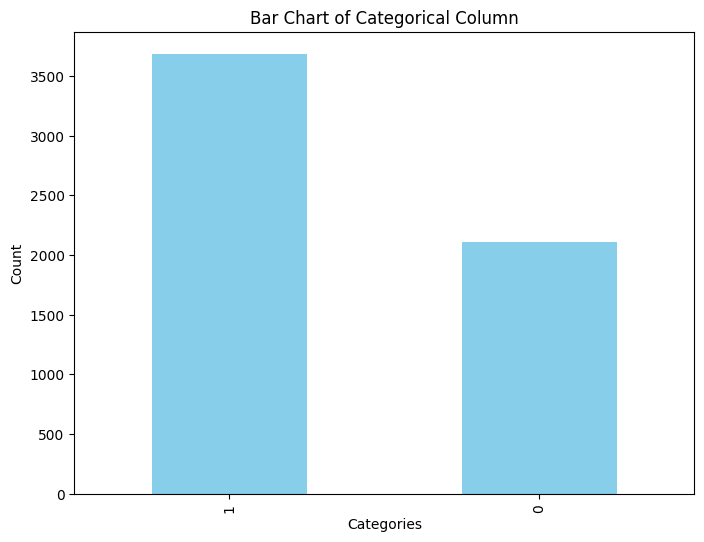

In [7]:
 # Get value counts
value_counts = df['sentiment'].value_counts()

# Plotting the bar chart
plt.figure(figsize=(8, 6))
value_counts.plot(kind='bar', color='skyblue')
plt.title('Bar Chart of Categorical Column')
plt.xlabel('Categories')
plt.ylabel('Count')
plt.show()


In [8]:
# label_encoder = preprocessing.LabelEncoder()
# df['sentiment']= label_encoder.fit_transform(df['sentiment'])

# df['sentiment'].unique()

In [9]:
# def truncate_size_news(s, length_news = 500):
#   if len(s) > length_news:
#     return s[:length_news]
#   return s
# df['news'] = df['news'].apply(truncate_size_news)

In [10]:
!wget https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip

--2023-12-08 01:33:48--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glove.6B.zip        100%[===================>] 822.24M  5.11MB/s    in 2m 39s  

2023-12-08 01:36:28 (5.16 MB/s) - ‘glove.6B.zip’ saved [862182613/862182613]



In [11]:
!unzip glove.6B.zip

Archive:  glove.6B.zip
  inflating: glove.6B.50d.txt        
  inflating: glove.6B.100d.txt       
  inflating: glove.6B.200d.txt       
  inflating: glove.6B.300d.txt       


In [12]:
words = dict()
def add_to_dict(d, filename):
  with open(filename,'r') as f:
    for line in f.readlines():
      line = line.split(' ')
      #print(line)

      try:
        d[line[0]] = np.array(line[1:],dtype=float)
      except:
        continue

In [13]:
add_to_dict(words, 'glove.6B.50d.txt')
#words

In [14]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [15]:
tokenizer = nltk.RegexpTokenizer(r"\w+")

tokenizer.tokenize('@user try to tokenize this.')

['user', 'try', 'to', 'tokenize', 'this']

In [16]:
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

def sent_to_token_list(s):
  tokens = tokenizer.tokenize(s)
  lowercased_tokens = [t.lower() for t in tokens]
  lemmatized_tokens = [lemmatizer.lemmatize(t) for t in lowercased_tokens]
  useful_tokens = [t for t in lemmatized_tokens if t in words]

  return useful_tokens

def sent_to_word_vectors(sent, word_dict=words):
  processed_list_of_tokens = sent_to_token_list(sent)

  vectors = []

  for token in processed_list_of_tokens:
    if token not in word_dict:
      continue
    token_vector  = word_dict[token]
    vectors.append(token_vector)

  return np.array(vectors, dtype=float )

In [17]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(df[['text']],df[['sentiment']], test_size=0.1)

X_train, X_val, y_train, y_val = train_test_split(X_train,y_train, test_size=0.1)

In [18]:
X_train

,text
2957,"CHK 6,600 Weekly 20.50P bought vs. OI of 148"
1646,"AAP if AAP closes below 455.01, i plan to swin..."
4291,AX next stop 42.90!!!
1324,user brain fart in earlier post. Meant ZAGG no...
3296,AAP we close below 435 today.... thats no good...
...,...
4097,PK taking some off here
1863,HA Over 41.25
4551,short OC starting to work towards 38
873,Disney's new Infinity game is going to be huge...


In [19]:
def df_to_X(x):
  all_word_to_sequence = []

  for sent in x['text']:
    sent_as_vector_seq = sent_to_word_vectors(sent)

    if sent_as_vector_seq.shape[0] == 0:
      sent_as_vector_seq = np.zeros(shape=(1,50))
    all_word_to_sequence.append(sent_as_vector_seq)
  return all_word_to_sequence


In [20]:
X_train

,text
2957,"CHK 6,600 Weekly 20.50P bought vs. OI of 148"
1646,"AAP if AAP closes below 455.01, i plan to swin..."
4291,AX next stop 42.90!!!
1324,user brain fart in earlier post. Meant ZAGG no...
3296,AAP we close below 435 today.... thats no good...
...,...
4097,PK taking some off here
1863,HA Over 41.25
4551,short OC starting to work towards 38
873,Disney's new Infinity game is going to be huge...


In [21]:
X_train = df_to_X(X_train)
X_val = df_to_X(X_val)
X_test = df_to_X(X_test)

(array([370., 602., 603., 665., 727., 818., 488., 284., 113.,  19.]),
 array([ 1. ,  4.2,  7.4, 10.6, 13.8, 17. , 20.2, 23.4, 26.6, 29.8, 33. ]),
 <BarContainer object of 10 artists>)

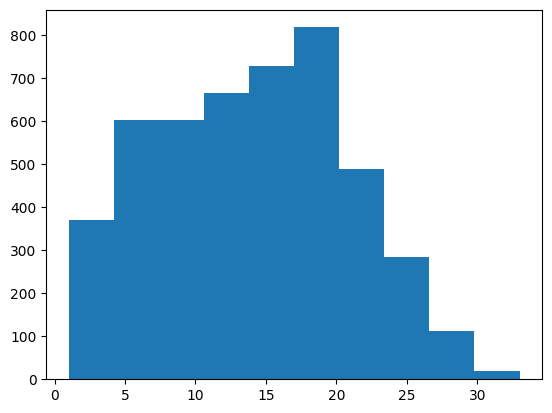

In [22]:
sequence_lengths = []

for i in range(len(X_train)):
  sequence_lengths.append(len(X_train[i]))

import matplotlib.pyplot as plt

plt.hist(sequence_lengths)

In [23]:
pd.Series(sequence_lengths).describe()

count    4689.000000
mean       14.028151
std         6.669525
min         1.000000
25%         9.000000
50%        14.000000
75%        19.000000
max        33.000000
dtype: float64

In [24]:


from copy import deepcopy

def pad_X(X, desired_sequence_length=50):
  X_copy = deepcopy(X)

  for i, x in enumerate(X):
    x_seq_len = x.shape[0]
    sequence_length_difference = desired_sequence_length - x_seq_len
    if sequence_length_difference < 0: ### NOTE: TRUNCATE IF sequence_length is negative
      X_copy[i] = x[:-sequence_length_difference]
    elif sequence_length_difference > 0:
      pad = np.zeros(shape=(sequence_length_difference, 50))

      X_copy[i] = np.concatenate([x, pad])

  return np.array(X_copy).astype(float)

In [25]:
X_train = pad_X(X_train)
X_test = pad_X(X_test)
X_val = pad_X(X_val)

In [26]:
X_train.shape

(4689, 50, 50)

In [27]:
X_train

array([[[-5.2671e-02,  6.2510e-02,  9.4078e-01, ..., -2.2644e-01,
         -8.4216e-01,  5.0291e-01],
        [-3.6204e-01,  8.6104e-01,  7.5856e-01, ..., -9.5132e-01,
          2.8706e-01,  4.3087e-01],
        [ 8.0961e-01,  1.3725e-01,  1.5693e+00, ...,  2.0279e-01,
         -1.0255e+00, -5.3277e-01],
        ...,
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00, ...,  0.0000e+00,
          0.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00, ...,  0.0000e+00,
          0.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00, ...,  0.0000e+00,
          0.0000e+00,  0.0000e+00]],

       [[-1.1646e+00, -2.5805e-01, -1.0139e-01, ...,  1.5094e+00,
          1.1459e+00,  4.7920e-01],
        [ 4.9861e-01, -1.2284e-01,  4.4772e-01, ...,  2.6395e-01,
         -6.2214e-02,  6.2920e-01],
        [-1.1646e+00, -2.5805e-01, -1.0139e-01, ...,  1.5094e+00,
          1.1459e+00,  4.7920e-01],
        ...,
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00, ...,  

In [28]:
X_test.shape

(580, 50, 50)

In [29]:
X_test

array([[[-1.7321  ,  0.24589 ,  0.068075, ..., -0.87019 ,  0.11541 ,
          0.23621 ],
        [ 0.12972 ,  0.088073,  0.24375 , ...,  0.090912, -0.60515 ,
         -0.9827  ],
        [ 0.33239 ,  0.4212  ,  1.5362  , ..., -0.11566 , -0.2262  ,
          0.12011 ],
        ...,
        [ 0.      ,  0.      ,  0.      , ...,  0.      ,  0.      ,
          0.      ],
        [ 0.      ,  0.      ,  0.      , ...,  0.      ,  0.      ,
          0.      ],
        [ 0.      ,  0.      ,  0.      , ...,  0.      ,  0.      ,
          0.      ]],

       [[ 0.25009 , -0.033956,  0.094114, ...,  0.8398  , -0.29115 ,
          0.078721],
        [-0.36204 ,  0.86104 ,  0.75856 , ..., -0.95132 ,  0.28706 ,
          0.43087 ],
        [-0.45318 , -0.59524 ,  0.13364 , ...,  0.30405 , -0.19954 ,
          0.28099 ],
        ...,
        [ 0.      ,  0.      ,  0.      , ...,  0.      ,  0.      ,
          0.      ],
        [ 0.      ,  0.      ,  0.      , ...,  0.      ,  0.      ,
   

In [30]:
X_val.shape

(522, 50, 50)

In [31]:
X_val


array([[[ 0.75753  , -0.74288  ,  0.88072  , ...,  0.80681  ,
          0.19825  ,  1.0365   ],
        [-0.41753  , -0.77215  , -0.77358  , ..., -0.60813  ,
          0.25397  ,  0.96259  ],
        [-0.19656  , -0.29887  , -0.19982  , ...,  1.6475   ,
          0.38516  , -0.14371  ],
        ...,
        [ 0.       ,  0.       ,  0.       , ...,  0.       ,
          0.       ,  0.       ],
        [ 0.       ,  0.       ,  0.       , ...,  0.       ,
          0.       ,  0.       ],
        [ 0.       ,  0.       ,  0.       , ...,  0.       ,
          0.       ,  0.       ]],

       [[ 0.25616  ,  0.43694  , -0.11889  , ..., -0.07573  ,
         -0.25868  , -0.39339  ],
        [-1.1061   , -0.88872  ,  0.81556  , ...,  0.73738  ,
          0.82096  ,  0.78178  ],
        [ 0.27172  , -0.59215  ,  0.54509  , ...,  0.41987  ,
          0.054055 ,  0.33699  ],
        ...,
        [ 0.       ,  0.       ,  0.       , ...,  0.       ,
          0.       ,  0.       ],
        [ 0.

In [32]:
y_train

,sentiment
2957,0
1646,0
4291,0
1324,1
3296,0
...,...
4097,1
1863,1
4551,0
873,1


In [33]:
y_test

,sentiment
2620,1
2184,1
1108,1
1085,0
2205,1
...,...
3420,1
2976,1
1546,1
3626,1


In [34]:
y_val

,sentiment
225,1
5229,0
4642,1
4350,0
4491,1
...,...
2804,1
2316,1
3606,0
3012,1


In [35]:
# y_train_labels = y_train.to_numpy().astype(int)
# y_val_labels = y_val.to_numpy().astype(int)
# y_test_labels = y_test.to_numpy().astype(int)


In [55]:
import tensorflow as tf
from tensorflow.keras.optimizers import Adam

model = tf.keras.models.Sequential([])
model.add(tf.keras.layers.Input(shape=(50,50)))
model.add(tf.keras.layers.LSTM(30, return_sequences=True))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

In [56]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 50, 30)            9720      
                                                                 
 dropout_3 (Dropout)         (None, 50, 30)            0         
                                                                 
 flatten_3 (Flatten)         (None, 1500)              0         
                                                                 
 dense_3 (Dense)             (None, 1)                 1501      
                                                                 
Total params: 11221 (43.83 KB)
Trainable params: 11221 (43.83 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [57]:


cp = tf.keras.callbacks.ModelCheckpoint('model/',save_best_only=True)

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [58]:
history = model.fit(X_train, y_train, epochs=20, batch_size=128, validation_data=(X_val,y_val))

Epoch 1/20
37/37 [==============================] - 3s 20ms/step - loss: 0.6592 - accuracy: 0.6264 - val_loss: 0.6385 - val_accuracy: 0.6494
Epoch 2/20
37/37 [==============================] - 0s 9ms/step - loss: 0.6352 - accuracy: 0.6460 - val_loss: 0.6225 - val_accuracy: 0.6686
Epoch 3/20
37/37 [==============================] - 0s 8ms/step - loss: 0.6159 - accuracy: 0.6697 - val_loss: 0.6129 - val_accuracy: 0.6782
Epoch 4/20
37/37 [==============================] - 0s 8ms/step - loss: 0.5969 - accuracy: 0.6795 - val_loss: 0.6097 - val_accuracy: 0.6897
Epoch 5/20
37/37 [==============================] - 0s 8ms/step - loss: 0.5752 - accuracy: 0.6955 - val_loss: 0.6056 - val_accuracy: 0.6916
Epoch 6/20
37/37 [==============================] - 0s 8ms/step - loss: 0.5606 - accuracy: 0.7123 - val_loss: 0.5898 - val_accuracy: 0.6916
Epoch 7/20
37/37 [==============================] - 0s 8ms/step - loss: 0.5385 - accuracy: 0.7242 - val_loss: 0.5777 - val_accuracy: 0.7011
Epoch 8/20
37/37 [=

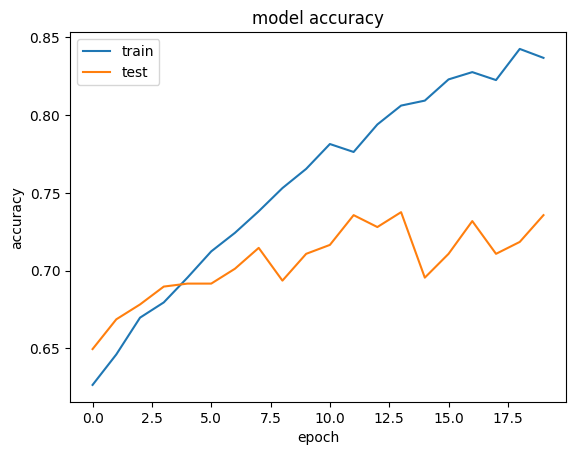

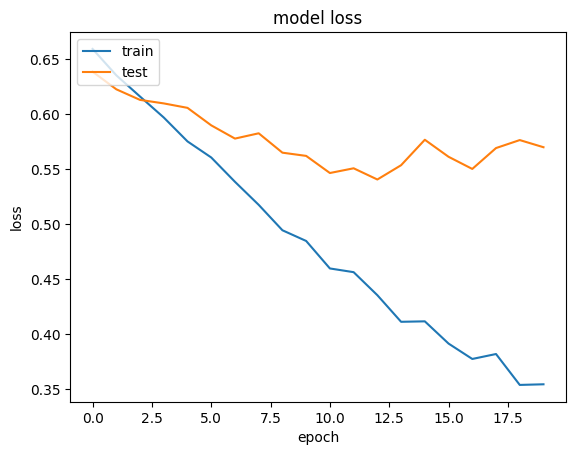

In [59]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [60]:
y_pred = (model.predict(X_test) > 0.5).astype(int)

19/19 [==============================] - 0s 3ms/step


In [61]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.743103448275862

In [62]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.77      0.49      0.60       226
           1       0.73      0.91      0.81       354

    accuracy                           0.74       580
   macro avg       0.75      0.70      0.70       580
weighted avg       0.75      0.74      0.73       580



[[110  33]
 [116 321]]


Text(0.5, 1.0, 'Confusion Matrix: NN')

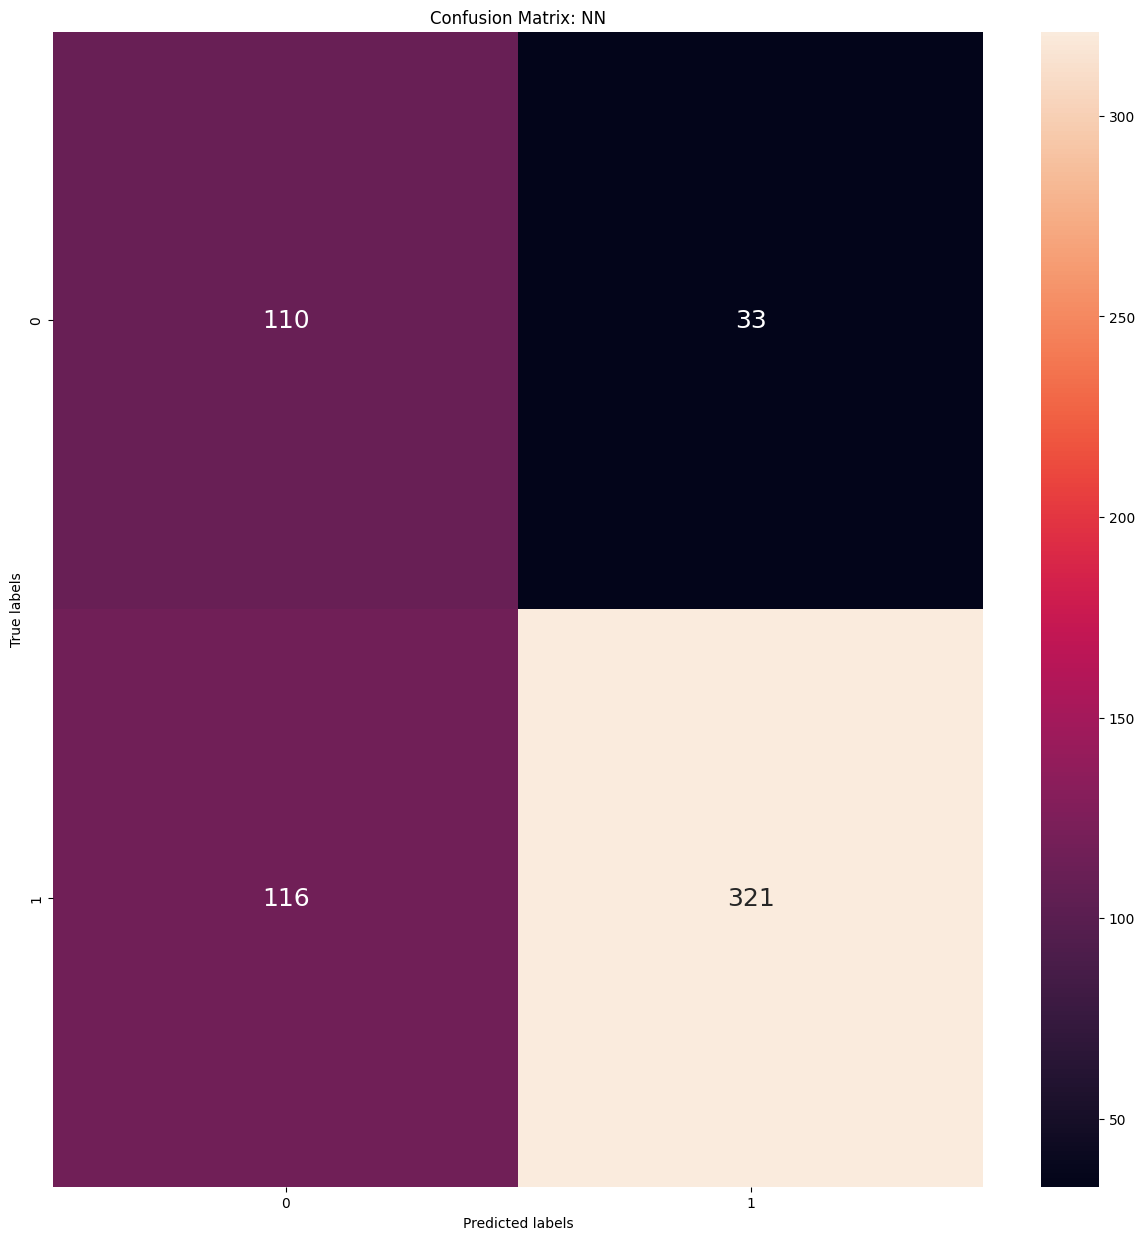

In [63]:
from sklearn.metrics import confusion_matrix

CNN_CM=confusion_matrix(y_pred, y_test)
print(CNN_CM)

#########################################
## Pretty Confusion Matrix........................
#######################################
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(CNN_CM, annot=True, fmt='g', ax=ax, annot_kws={'size': 18})
#annot=True to annotate cells, ftm='g' to disable scientific notation
# annot_kws si size  of font in heatmap
# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix: NN')
# ax.xaxis.set_ticklabels(list(set(y_test)),rotation=90, fontsize = 18)
# ax.yaxis.set_ticklabels(list(set(y_test)),rotation=0, fontsize = 18)